In [1]:
# 1. Использовать датасет, подготовленный на первой лабораторной работе.
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

df = pd.read_csv("../Lab1/processed_lab1.csv")  # путь к файлу

In [2]:
# Разделим датасет, подготовленный на первой лабораторной работе, на обучающую и тестовую выборки.

# Проверка первоначального датасета
df.head()
print("Длина первоначального датасета: ", len(df))

# Данные для задачи РЕГРЕССИИ
X_regression = df.drop(['Age'], axis="columns")
y_regression = df['Age']

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.4, random_state=42)
print(f"\n\nДлина тренировочной выборки для регрессия X_train_regression: {len(X_train_regression)}\nДлина тестовой выборки для регрессии X_test_regression: {len(X_test_regression)}\nПроверка на соответствие первоначальному датасету (сумма): {len(X_train_regression)} + {len(X_test_regression)} = {len(X_train_regression)+len(X_test_regression)} ?= {len(df)}\n\n")

# Данные для задачи КЛАССИФИКАЦИИ
X_classification = df.drop(['Transported'], axis="columns")
y_classification = df['Transported']

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.4, random_state=42)
print(f"Длина тренировочной выборки для классификация X_train_classification: {len(X_train_classification)}\nДлина тестовой выборки для классификация X_test_classification: {len(X_test_classification)}\nПроверка на соответствие первоначальному датасету (сумма): {len(X_train_classification)} + {len(X_test_classification)} = {len(X_train_classification) + len(X_test_classification)} ?= {len(df)}\n\n")

# Проверка полученных выборок
print("X_train_regression:")
display(X_train_regression.head(5))

print("\n\nX_test_regression:")
display(X_test_regression.head(5))

print("\n\nX_train_classification: ")
display(X_train_classification.head(5))

print("\n\nX_test_classification")
display(X_test_classification.head(5))

Длина первоначального датасета:  8693


Длина тренировочной выборки для регрессия X_train_regression: 5215
Длина тестовой выборки для регрессии X_test_regression: 3478
Проверка на соответствие первоначальному датасету (сумма): 5215 + 3478 = 8693 ?= 8693


Длина тренировочной выборки для классификация X_train_classification: 5215
Длина тестовой выборки для классификация X_test_classification: 3478
Проверка на соответствие первоначальному датасету (сумма): 5215 + 3478 = 8693 ?= 8693


X_train_regression:


,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_S
4475,0,0,0.012913,0.000000,0.020262,0.080775,0.002196,0,False,False,False,True,False,False,False,False,True,False,False,True
7118,0,0,0.572974,0.000604,0.018389,0.158872,0.002238,0,True,False,False,True,False,True,False,False,False,False,False,True
7212,0,0,0.410972,0.000000,0.000553,0.000536,0.000000,0,False,True,False,True,False,False,False,False,True,False,False,True
6982,0,0,0.038389,0.000000,0.002597,0.000179,0.000207,0,False,False,False,True,False,False,False,False,False,True,False,True
8248,0,0,0.028827,0.000000,0.000000,0.000312,0.014379,0,False,False,True,False,False,False,False,False,False,True,False,True




X_test_regression:


,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_S
304,0,0,0.029106,0.011706,0.026988,0.000134,0.043799,1,False,True,False,True,False,False,False,False,True,False,False,True
2697,0,0,0.000279,0.030322,0.000000,0.000000,0.000041,0,False,False,False,True,False,False,False,False,False,True,False,True
8424,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,False,False,False,True,False,False,False,False,False,True,False,True
1672,0,0,0.000000,0.011337,0.018560,0.000000,0.000000,1,False,False,False,True,False,False,False,False,False,True,False,False
8458,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,True,False,False,True,False,False,True,False,False,False,False,False




X_train_classification: 


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_S
4475,0,24.0,0,0.012913,0.000000,0.020262,0.080775,0.002196,False,False,False,True,False,False,False,False,True,False,False,True
7118,0,39.0,0,0.572974,0.000604,0.018389,0.158872,0.002238,True,False,False,True,False,True,False,False,False,False,False,True
7212,0,46.0,0,0.410972,0.000000,0.000553,0.000536,0.000000,False,True,False,True,False,False,False,False,True,False,False,True
6982,0,21.0,0,0.038389,0.000000,0.002597,0.000179,0.000207,False,False,False,True,False,False,False,False,False,True,False,True
8248,0,41.0,0,0.028827,0.000000,0.000000,0.000312,0.014379,False,False,True,False,False,False,False,False,False,True,False,True




X_test_classification


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_S
304,0,19.0,0,0.029106,0.011706,0.026988,0.000134,0.043799,False,True,False,True,False,False,False,False,True,False,False,True
2697,0,18.0,0,0.000279,0.030322,0.000000,0.000000,0.000041,False,False,False,True,False,False,False,False,False,True,False,True
8424,1,41.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,True,False,False,False,False,False,True,False,True
1672,0,35.0,0,0.000000,0.011337,0.018560,0.000000,0.000000,False,False,False,True,False,False,False,False,False,True,False,False
8458,1,43.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,False,True,False,False,True,False,False,False,False,False


Дерево решений для задачи регрессии:



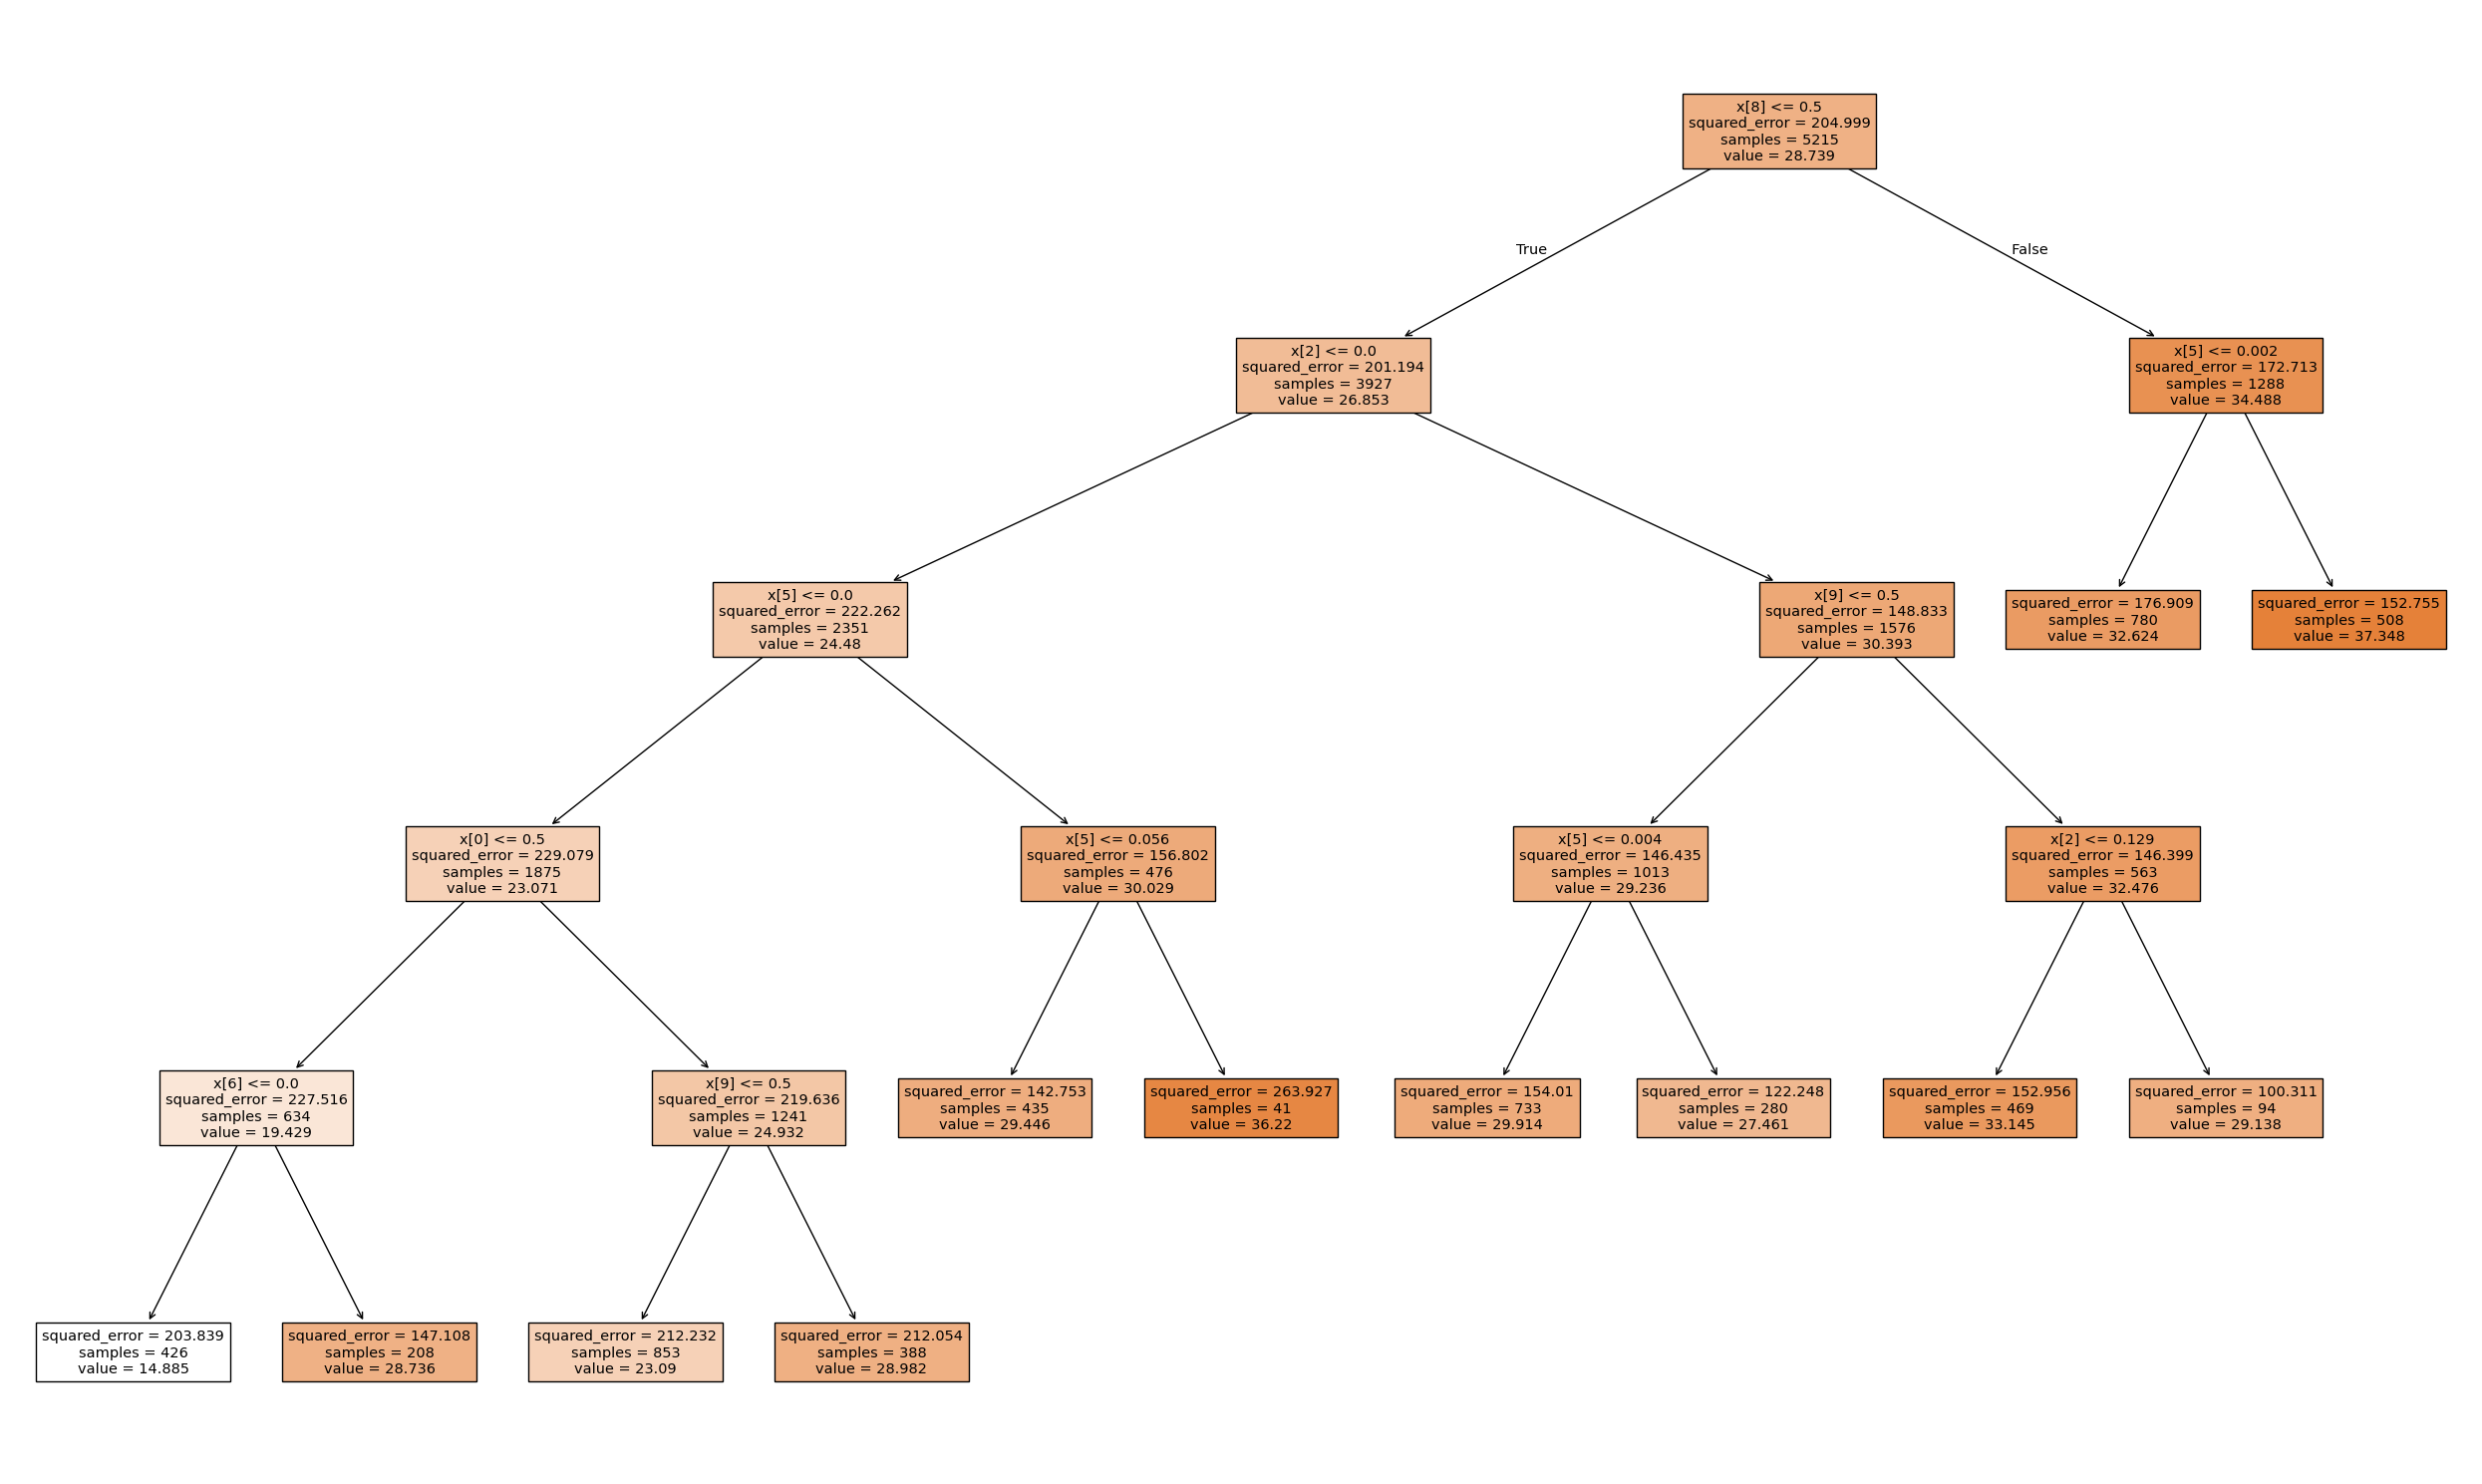

Оценки модели:
MSE: 183.77635045396812
RMSE: 13.556413628020064
MAE: 10.714352788320202



In [3]:
# 2. Решить задачу регрессии для одного из непрерывных признаков в датасете. Оценить работу регрессионной модели.

dt_regressor_model = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=12)
dt_regressor_model.fit(X_train_regression, y_train_regression)

# Изображение дерева решений
print("Дерево решений для задачи регрессии:\n")
plt.figure(figsize=(25, 15))
tree.plot_tree(dt_regressor_model, filled=True)
plt.tight_layout()
plt.show()

# Вероятностное предсказание
y_predict_test_regression = dt_regressor_model.predict(X_test_regression)

# Оценка работы регрессионной модели
# MSE (Mean Square Error, среднеквадратичная ошибка)
MSE = mean_squared_error(y_test_regression, y_predict_test_regression)

# RMSE (Root MSE, корень среднеквадратичной ошибки)
RMSE = root_mean_squared_error(y_test_regression, y_predict_test_regression)

# MAE (Mean Absolute Error, средняя абсолютная ошибка)
MAE = mean_absolute_error(y_test_regression, y_predict_test_regression)

print(f"Оценки модели:\nMSE: {MSE}\nRMSE: {RMSE}\nMAE: {MAE}\n")


Дерево решений для задачи классификации:



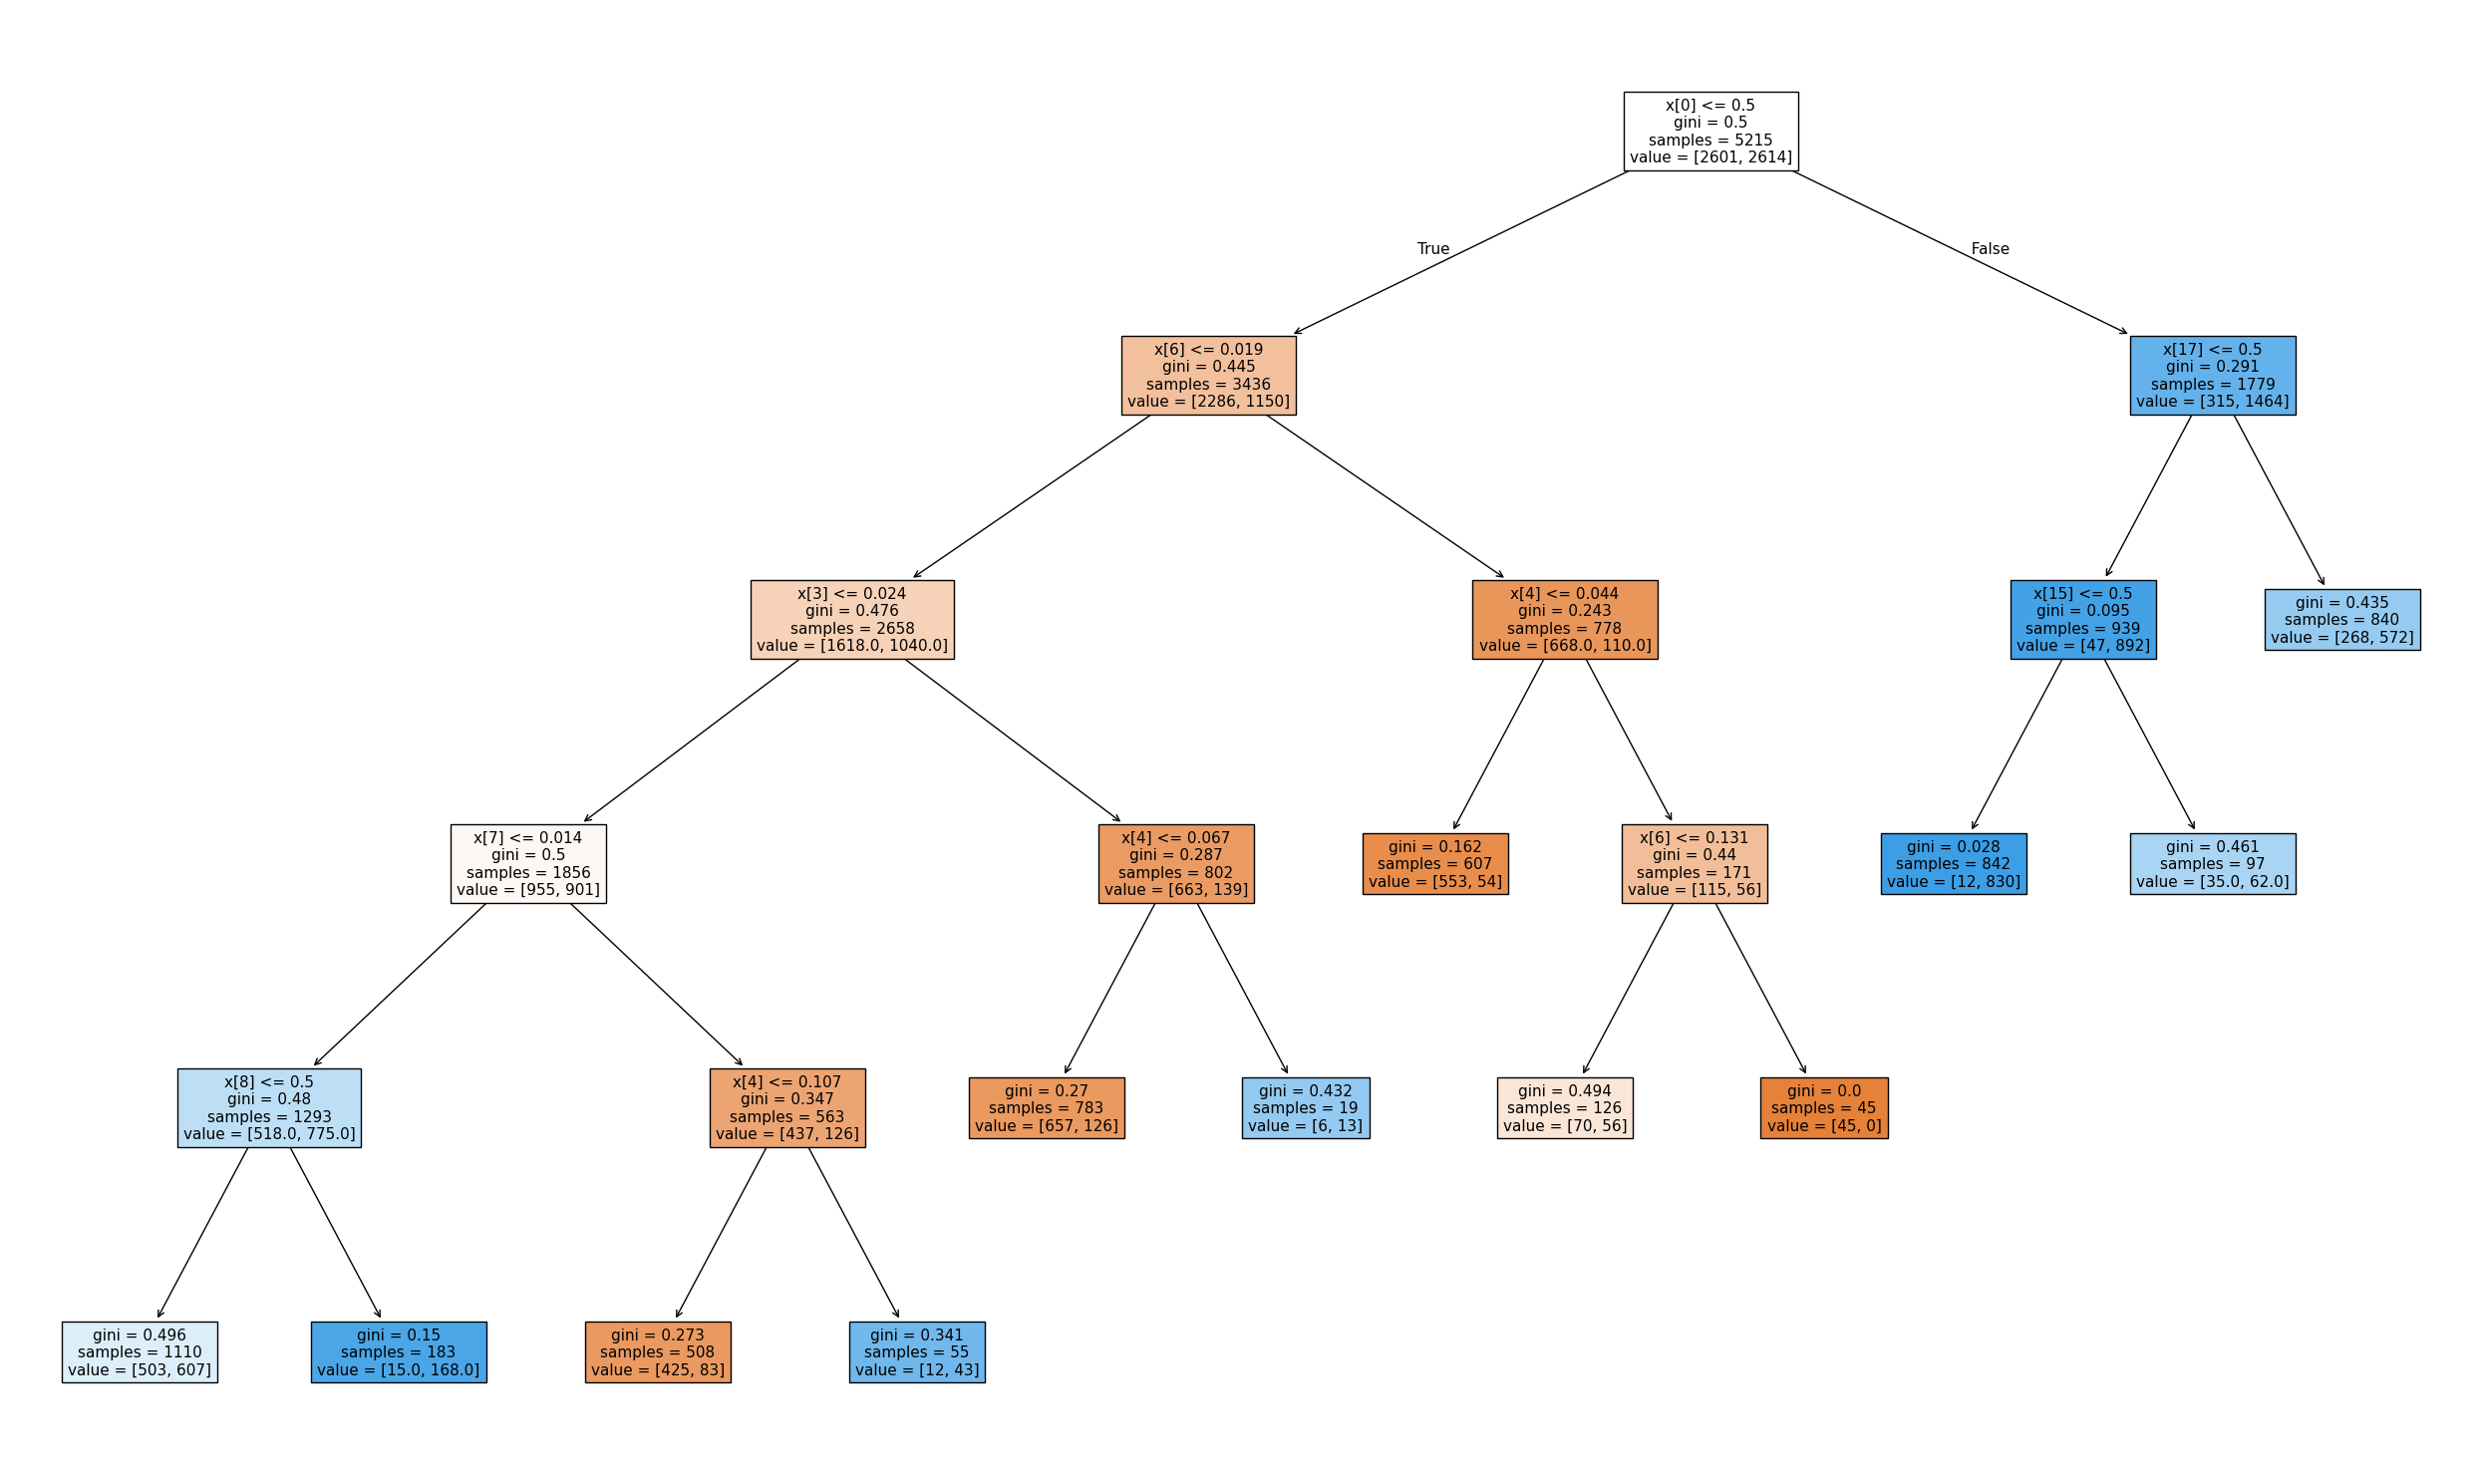

[0 1]

ROC-кривая модели классификации:



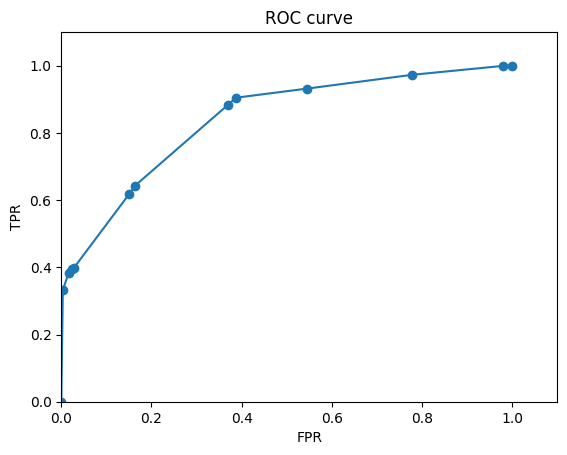

AUC: 0.8392609085641258


In [4]:
# 3. Решить задачу классификации и оценить работу модели с помощью ROC-кривой.

dt_classifier_model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=12)
dt_classifier_model.fit(X_train_classification, y_train_classification)

# Изображение дерева решений
print("Дерево решений для задачи классификации:\n")
plt.figure(figsize=(25, 15))
tree.plot_tree(dt_classifier_model, filled=True)
plt.tight_layout()
plt.show()

# Вероятностное предсказание
y_predict_test_classification = dt_classifier_model.predict_proba(X_test_classification)[:, 1]
print(dt_classifier_model.classes_)

# Оценка работы модели с помощью ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test_classification, y_predict_test_classification)

print("\nROC-кривая модели классификации:\n")
plt.plot(fpr, tpr, marker='o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')
plt.show()

# plt.figure(figsize=(10, 10))
# plt.grid(True)
# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.plot(fpr, tpr, label="ROC curve (area = {:.2f})".format(roc_curve(y_test_classification, y_predict_test_classification)[1].mean()))
# plt.legend(loc="lower right")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC curve")
# plt.show()

# ROC-AUC
auc_metric = auc(fpr, tpr)
print(f"AUC: {auc_metric}")